In [33]:
import lib_ar as ar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

/tmp/ipykernel_50365/2766041306.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('endsemfit.txt', header=None, delim_whitespace=True)
/tmp/ipykernel_50365/2766041306.py:13: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * t)



DOF: 8
Lifetime: 473.5667458284211 ± 55.28238717739907
Chi square: 17.50038977187336
Reduced chi-square: 2.18754872148417
Chi square critical (From PDF): 15.507
Fit acceptable at 5% level of significance: False



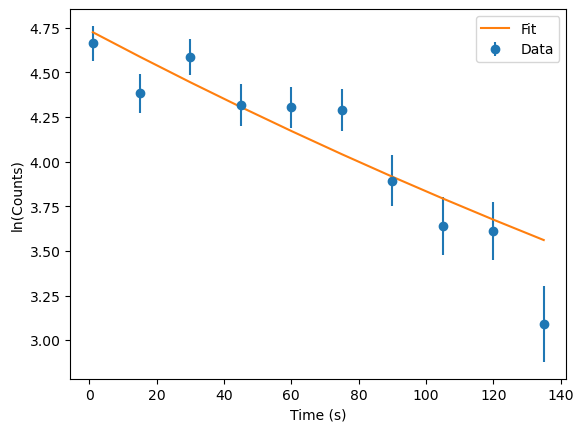

In [38]:
#Q1

# Load the data
data = pd.read_csv('endsemfit.txt', header=None, delim_whitespace=True)

time=np.array(data[0])
counts=data[1]
uncertainity_in_counts = data[2]


# Define the exponential decay function
def func(t, a, b):
	return a * np.exp(-b * t)

# Convert counts to natural logarithm and calculate its uncertainty
ln_counts = np.log(counts)
sigma_ln_counts = 1 / np.sqrt(counts)

# Use curve_fit to fit the exponential decay function to the data
popt, pcov = curve_fit(func, time, ln_counts, sigma=sigma_ln_counts, absolute_sigma=True)

# Calculate the lifetime and its error
lifetime = 1 / popt[1]
error_lifetime = np.sqrt(np.diag(pcov))[1] / popt[1]**2

# Calculate the chi-square statistic and the reduced chi-square statistic
chi_square = np.sum(((ln_counts - func(time, *popt)) / sigma_ln_counts) ** 2)
reduced_chi_square = chi_square / (len(time) - len(popt))

# Determine if the fit is acceptable at the 5% level of significance
degrees_of_freedom = len(time) - len(popt)

chi_square_critical = 15.507 #from pdf
fit_acceptable = chi_square <= chi_square_critical

print()
print('DOF:',degrees_of_freedom)
print(f"Lifetime: {lifetime} ± {error_lifetime}")
print('Chi square:',chi_square)
print(f"Reduced chi-square: {reduced_chi_square}")
print(f"Chi square critical (From PDF): {chi_square_critical}")
print(f"Fit acceptable at 5% level of significance: {fit_acceptable}")
print()

# Plot the data and the fit
plt.errorbar(time, ln_counts, yerr=sigma_ln_counts, fmt='o', label='Data')
popt = np.array(popt)
fit = func(time, *popt)
fit = np.array(fit)
plt.plot(time, fit, label='Fit')
plt.xlabel('Time (s)')
plt.ylabel('ln(Counts)')
plt.legend()
plt.show()

First Iteration
Volume: 3.9299460080936357


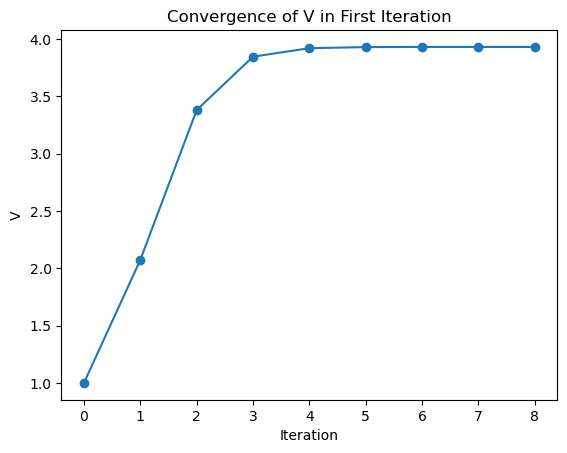

Second Iteration
Volume: 0.18569418599227414


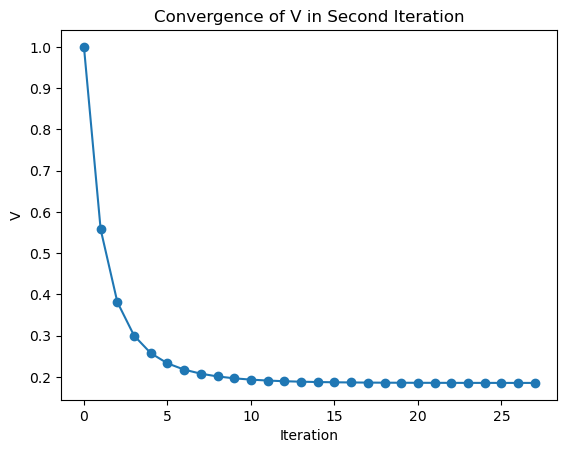

In [32]:
#Q2

# Constants
p = 5.95
R = 0.0821
T = 300
a = 6.254
b = 0.05422

print("First Iteration")

# Rearranged Van Der Waals Eq of State 
def fixed_point_V(V):
	return ((R * T) / (p + a/V**2)) + b

# Initial guess
V = 1
V_values1 = [V]

# Iteratively compute V
while True:
	V_next = fixed_point_V(V)
	if abs(V_next - V) < 1e-5:
		break
	V = V_next
	V_values1.append(V)


print(f"Volume: {V}")

plt.figure()
plt.plot(V_values1,'o-')
plt.title('Convergence of V in First Iteration')
plt.xlabel('Iteration')
plt.ylabel('V')
plt.show()

print("Second Iteration")

# Rearranged Van Der Waals Eq of State 
def fixed_point_V2(V):
	return np.sqrt(((R * T)/(V - b) - p)**-1) * np.sqrt(a)

# Different Initial Guess
V = 1
V_values2 = [V]

# Iteratively compute V
while True:
	V_next = fixed_point_V2(V)
	if abs(V_next - V) < 1e-5:
		break
	V = V_next
	V_values2.append(V)


print(f"Volume: {V}")
plt.figure()
plt.plot(V_values2,'o-')
plt.title('Convergence of V in Second Iteration')
plt.xlabel('Iteration')
plt.ylabel('V')
plt.show()

We get different solutions with different fixed-point equations, it's because the van der Waals equation is a cubic equation in V, and cubic equations can have up to three real roots. The fixed-point method can converge to different roots depending on the initial guess and the form of the fixed-point equation.

In [23]:
#Q5

# Load the matrix
matrix = np.loadtxt('endsemmat.txt')

# Print the matrix
print("Matrix:")
print(matrix)
print()


# Get the first two largest eigenvalues and their corresponding eigenvectors
eigenvalues = []
eigenvectors = []
matrix_n = matrix
for _ in range(2):
	eigenvalue, eigenvector = ar.power_method(matrix_n, 1000)
	eigenvalues.append(eigenvalue)
	eigenvectors.append(eigenvector)

	# Deflate the matrix
	matrix_n = matrix_n - eigenvalue * np.outer(eigenvector, eigenvector)

# Print the eigenvalues and eigenvectors
print("Calculated Eigenvalues and Eigenvectors:\n")
for i in range(2):
	print(f"Eigenvalue {i+1}: {eigenvalues[i]}")
	print(f"Eigenvector {i+1}: {eigenvectors[i]}")
	print()

#check if they match λk = b + 2√ac cos(kπ/n + 1) and vi_k = 2(√c/a)^k sin(ikπ/n + 1)
#where a = c = -1, b = 2, n = 5, k =1,2,3,4,5 and i is i-th component of the kth eigenvector

# Constants
a = c = -1
b = 2
n = 5

# Calculate expected eigenvalues and eigenvectors
expected_eigenvalues = [b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1)) for k in range(1, 6)]
expected_eigenvectors = [[2 * (np.sqrt(c / a))**k * np.sin(i * k * np.pi / (n + 1)) for i in range(1, n + 1)] for k in range(1, 6)]

#normalizing 
expected_eigenvectors = np.array(expected_eigenvectors)
expected_eigenvectors = expected_eigenvectors / np.linalg.norm(expected_eigenvectors, axis=1)[:, np.newaxis]

print("Comparison with expected values:\n")
# Print the expected and computed eigenvalues and eigenvectors
for i in range(2):
	print(f"Expected eigenvalue {i+1}: {expected_eigenvalues[i]}")
	print(f"Computed eigenvalue {i+1}: {eigenvalues[i]}")
	print()
	print(f"Expected eigenvector {i+1}: {expected_eigenvectors[i]}")
	print(f"Computed eigenvector {i+1}: {eigenvectors[i]}")
	print()

Matrix:
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]

Calculated Eigenvalues and Eigenvectors:

Eigenvalue 1: 3.732050807568877
Eigenvector 1: [ 0.28867513 -0.5         0.57735027 -0.5         0.28867513]

Eigenvalue 2: 3.0
Eigenvector 2: [-5.00000000e-01  5.00000000e-01 -1.52544957e-16 -5.00000000e-01
  5.00000000e-01]

Comparison with expected values:

Expected eigenvalue 1: 3.7320508075688776
Computed eigenvalue 1: 3.732050807568877

Expected eigenvector 1: [0.28867513 0.5        0.57735027 0.5        0.28867513]
Computed eigenvector 1: [ 0.28867513 -0.5         0.57735027 -0.5         0.28867513]

Expected eigenvalue 2: 3.0
Computed eigenvalue 2: 3.0

Expected eigenvector 2: [ 5.00000000e-01  5.00000000e-01  7.07050159e-17 -5.00000000e-01
 -5.00000000e-01]
Computed eigenvector 2: [-5.00000000e-01  5.00000000e-01 -1.52544957e-16 -5.00000000e-01
  5.00000000e-01]



Success probability: 0.4848743448135416


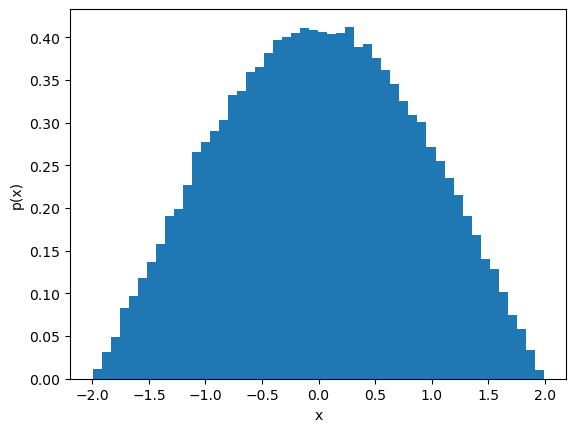

In [14]:
#Q6

#use accept/reject method to generate pRNG distributed as 
#p(x) = 0.5*(a**2 - x**2) for -a<=x<=a and a = 2 and zero elsewhere

# Constants
a = 2
N = 100000  # number of samples to generate

# Target distribution
def p(x):
	return 0.5 * (a**2 - x**2) if abs(x) < a else 0

# Generate samples
samples = []
num_rejected = 0
while len(samples) < N:
	x = np.random.normal(0, a)  # sample from Gaussian distribution
	u = np.random.uniform(0, 0.5 * a**2)  # uniform random number
	if u < p(x):
		samples.append(x)
	else:
		num_rejected += 1

# Print success probability
print(f"Success probability: {N / (N + num_rejected)}")

# Plot histogram of samples
plt.hist(samples, bins=50, density=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()



We get a success probability (or efficiency) of about 0.48 which I think is not unusual for the accept/reject method, especially when the proposal distribution (in this case, the Gaussian distribution) is not a very good match for the target distribution.

If we want to increase the success probability, we could try to find a proposal distribution that better matches the target distribution.

Expectation value of Hamiltonian:
a = 0.1: E = 2.393132203244434
a = 0.2: E = 1.294596053739587
a = 0.3: E = 0.8153804071611941
a = 0.4: E = 0.6024437263003234
a = 0.5: E = 0.4830379977008416
a = 0.6: E = 0.4135589694602904
a = 0.7: E = 0.3892732596451835
a = 0.7999999999999999: E = 0.3044541431613648
a = 0.8999999999999999: E = 0.2655442645536222
a = 0.9999999999999999: E = 0.2466926333661926
a = 1.0999999999999999: E = 0.2616621177851991
a = 1.2: E = 0.19927357878277188
a = 1.3: E = 0.1914064297794568
a = 1.4: E = 0.16638865998740116
a = 1.5: E = 0.18156926751479532
a = 1.5999999999999999: E = 0.18280857610102447
a = 1.7: E = 0.15415685671906396
a = 1.8: E = 0.1183573121109998
a = 1.9: E = 0.14082905281110683
a = 2.0: E = 0.16060519710733687


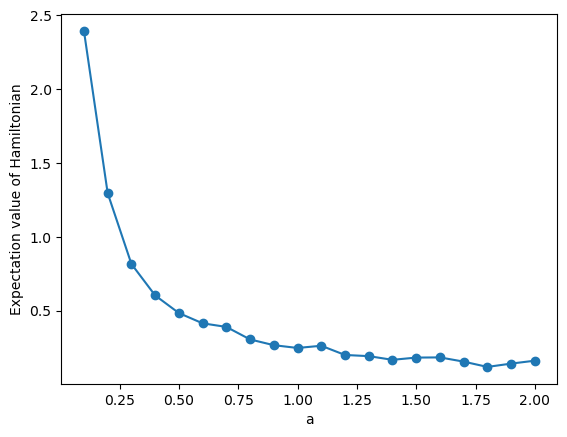

In [12]:
#Q7

# Constants
m = 1  # mass
omega = 1  # frequency
N = 20000  # number of Monte Carlo steps
a_values = np.linspace(0.1, 2.0, 20)  # variational parameters

# Trial wavefunction and its derivative
def psi(x, a):
	return np.exp(-a * x**2)

def psi_prime(x, a):
	return -2 * a * x * np.exp(-a * x**2)

# Hamiltonian
def H(x, a):
	kinetic = -0.5 * psi_prime(x, a) / psi(x, a)
	potential = 0.5 * m * omega**2 * x**2
	return kinetic + potential

# Monte Carlo step
def step(x, delta=1.0):
	return x + delta * (2 * np.random.rand() - 1)

# Initialize position
x = 0.0

E_a = []
# Perform Monte Carlo simulation for each variational parameter
for a in a_values:
	E_total = 0.0
	for i in range(N):
		x_new = step(x)
		if np.random.rand() < psi(x_new, a) / psi(x, a):
			x = x_new
		E_total += H(x, a)

	# Calculate expectation value of Hamiltonian
	E = E_total / N

	E_a.append(E)

	#print(f"Expectation value of Hamiltonian for a = {a}: {E}")

print('Expectation value of Hamiltonian:')
for i in range(len(a_values)):
	print(f"a = {a_values[i]}: E = {E_a[i]}")

#plot E_a vs a
plt.plot(a_values, E_a, 'o-')
plt.xlabel('a')
plt.ylabel('Expectation value of Hamiltonian')
plt.show()